<a href="https://colab.research.google.com/github/AustinKarki/75-Days-of-Coding-Challenge/blob/main/DECISIONTREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/Techaxis/car_evaluation.csv')
df.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [2]:
# root node - main branch
# branches -difference- outcomes (test) not features but target
# leaf nodes- class label(final node or outcomes or result) kind of target

# 1. whole training set as a root
# 2. Feature categorical
# 3. randomly categorized
# 4. attribues(target) as a root or intrnal root we should use statical approch


# 5. CART(Decision TRee)(Classification and regression tree) 1 random forest 2 boosted decision tree(XGBoost and other etc)


# Pruning: If u want to remove sub nodes of a decision node then the simple process is called pruning..opposite of distribution



# dataset  each attribute linxa ani decision tree algorith form a node
 # most import features as the root node afai linxa
 # for model evaluate

 # 1. Information gain(entropy- see the impurity) - Categorical
 # 2. Gini index - Continious _ higer value more good..is in probability range
  #  sum of the square of probability of success and probabiliy of failure

# over fitting (pratical problem)(over learn)(deeper to deeper ):

 #1. outliers(remove)(pc hang)
 #2. irrgularities

# 1. Pre_Pruning(thresold value fixed garna paryo)
# 2. Post-Pruning(Cross-Validation Techniqie or hyperparameter technique)(test your node and suggest you to improve or not)


# ordinal encoding - ASCII


# residual anusar hunxa linear regression



In [3]:
# rename the column

colnames=["buying","maint","doors","persons","lugboot","safety","class"]

df.columns=colnames
df.head() #door person features and class targt

,buying,maint,doors,persons,lugboot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   buying   1727 non-null   object
 1   maint    1727 non-null   object
 2   doors    1727 non-null   object
 3   persons  1727 non-null   object
 4   lugboot  1727 non-null   object
 5   safety   1727 non-null   object
 6   class    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


In [6]:
# ordinal is a type of categorical data which is in order

# non equal interval (good and very good)

In [7]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lugboot,0
safety,0
class,0


In [8]:
X=df.drop(["class"],axis=1) #if u want to take whole except target data
y=df["class"]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [10]:
# features engineering(transform raw data into useful and meaningful features) (model ko understanding ramro hoss ani predictive power bados)
X_train.dtypes


,0
buying,object
maint,object
doors,object
persons,object
lugboot,object
safety,object


In [11]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


In [12]:
# encoders(transform raw data into useful and meaningful features)

import category_encoders as ce

endode=ce.OrdinalEncoder(cols=["buying","maint","doors","persons","lugboot","safety"])
X_train=endode.fit_transform(X_train)
X_test=endode.transform(X_test)

In [13]:
X_train.head()

,buying,maint,doors,persons,lugboot,safety
1682,1,1,1,1,1,1
1465,1,2,1,2,2,2
103,2,3,2,3,3,2
1706,1,1,2,2,2,1
1478,1,2,1,3,3,1


In [14]:
# decison tree classifier with gini index

from sklearn.tree import DecisionTreeClassifier


In [15]:
# decision tree model with cr\iterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=42)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [16]:
y_pred_gini=clf_gini.predict(X_test)


In [18]:
# accquracy score # in percent #70 percent less is not good but classification is good

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.3f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index: 0.789


In [19]:
# check for model kati ko overfitting vaira xa vanne concept pauna

# now compairing the training set and testing set accuracy (overfitting)
y_pred_train_gini=clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'acc', ..., 'acc', 'acc', 'unacc'], dtype=object)

In [20]:
print('Training-set accuracy score: {0:0.3f}'.format(accuracy_score(y_test,y_pred_gini)))

Training-set accuracy score: 0.789


In [21]:
# again now we will check the scores on training and tesing set
# checking the overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_gini.score(X_train,y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test,y_test)))


Training set score: 0.7748
Test set score: 0.7890


[Text(0.375, 0.875, 'x[5] <= 1.5\ngini = 0.459\nsamples = 1381\nvalue = [310, 54, 964, 53]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 459\nvalue = [0, 0, 459, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.58\nsamples = 922\nvalue = [310.0, 54.0, 505.0, 53.0]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[0] <= 1.5\ngini = 0.625\nsamples = 306\nvalue = [157.0, 28.0, 95.0, 26.0]'),
 Text(0.125, 0.125, 'gini = 0.656\nsamples = 78\nvalue = [38, 20, 5, 15]'),
 Text(0.375, 0.125, 'gini = 0.568\nsamples = 228\nvalue = [119.0, 8.0, 90.0, 11.0]'),
 Text(0.75, 0.375, 'x[3] <= 2.5\ngini = 0.492\nsamples = 616\nvalue = [153, 26, 410, 27]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 301\nvalue = [0, 0, 301, 0]'),
 Text(0.875, 0.125, 'gini = 0.63\nsamples = 315\nvalue = [153, 26, 109, 27]')]

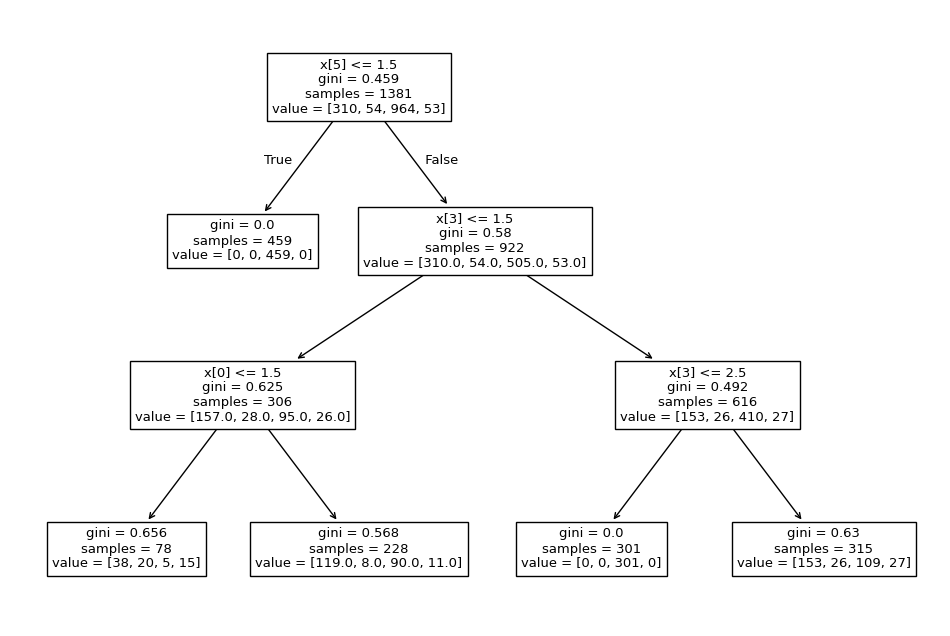

In [22]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train,y_train))



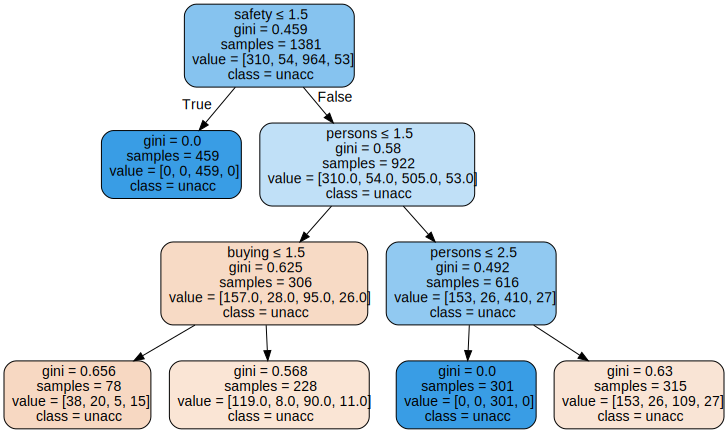

In [25]:
import graphviz
data=tree.export_graphviz(clf_gini,out_file=None,feature_names=X_train.columns,class_names=y_train,filled=True,rounded=True,special_characters=True)
dt=graphviz.Source(data)
dt
